# Исследование тарифных планов.

**Заказчик** — федеральный оператор сотовой связи «Мегалайн».

**Входные данные** - информация о 500 пользователях «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

 
**Цель исследования**:  сделать предварительный анализ тарифов оператора связи и сделать вывод — какой тариф приносит больше прибыли. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Описание тарифов:

- Тариф «Смарт»

    Ежемесячная плата: 550 рублей

    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

    Стоимость услуг сверх тарифного пакета: 
    1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
    2. сообщение: 3 рубля; 
    3. 1 Гб интернет-трафика: 200 рублей.
    

- Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    
    Стоимость услуг сверх тарифного пакета: 
    1. минута разговора: 1 рубль; 
    2. сообщение: 1 рубль;
    3. 1 Гб интернет-трафика: 150 рублей.
    

**Ход исследования**

 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ и описание данных
 4. Проверка гипотез и пояснения
 5. Общий вывод

## 1. Обзор и предобработка данных

Заказчик предоставил данные в следующих таблицах:

Таблица **users** (информация о пользователях):

- user_id — уникальный идентификатор пользователя

- first_name — имя пользователя

- last_name — фамилия пользователя

- age — возраст пользователя (годы)

- reg_date — дата подключения тарифа (день, месяц, год)

- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

- city — город проживания пользователя

- tarif — название тарифного плана

Таблица **calls** (информация о звонках):

- id — уникальный номер звонка

- call_date — дата звонка

- duration — длительность звонка в минутах

- user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):

- id — уникальный номер звонка

- message_date — дата сообщения

- user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):

- id — уникальный номер сессии

- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

- session_date — дата интернет-сессии

- user_id — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):

- tariff_name — название тарифа

- rub_monthly_fee — ежемесячная абонентская плата в рублях

- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

- messages_included — количество сообщений в месяц, включённых в абонентскую плату

- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

- rub_per_message — стоимость отправки сообщения сверх тарифного пакета

- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib для работы с графиками 
import matplotlib.pyplot as plt
# импорт math для выполнения математических операций
import math
# импорт stats и numpy для проверки гипотез 
from scipy import stats as st 
import numpy as np

In [2]:
# чтение файла с данными и сохранение в переменную data
#tariffs = pd.read_csv('/Users/larinav/Downloads/tariffs.csv')
#users = pd.read_csv('/Users/larinav/Downloads/users.csv')
#internet = pd.read_csv('/Users/larinav/Downloads/internet.csv')
#messages = pd.read_csv('/Users/larinav/Downloads/messages.csv')
#calls = pd.read_csv('/Users/larinav/Downloads/calls.csv')

tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
calls = pd.read_csv('/datasets/calls.csv')



### 1.1 Таблица tariffs

In [3]:
# обзор таблицы tariffs
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### 1.2 Таблица users

In [4]:
# обзор таблицы users
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
# получение общей информации о данных 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Заменим тип данных в столбце с датой на корректный и проверим за какой срок были представлены данные.

In [6]:
# изменение типа данных в call_date и обзор данных
users['reg_date'] = pd.to_datetime(users['reg_date'],format = "%Y-%m-%d")
print(users['reg_date'].min(),users['reg_date'].max())

2018-01-01 00:00:00 2018-12-31 00:00:00


В столбце churn_date с информацией о дате прекращения пользования тарифом выявлены пропуски. Для данного столбца , нет подходящего значения на замену, поэтому оставим эти значения пустыми.

In [7]:
# замена на пустую строку
users.churn_date = users.churn_date.fillna(" ")

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### 1.3 Таблица internet

In [9]:
# обзор таблицы internet
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [10]:
# получение общей информации о данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Необходимо также заменить тип данных в столбце с датой.

In [11]:
# изменение типа данных в session_date 
internet['session_date'] = pd.to_datetime(internet['session_date'],format = "%Y-%m-%d")

Добавим столбец month и сразу сгруппируем таблицу по id клиента и месяцу.

In [12]:
# добавление столбца с данными о месяце
internet['month']=pd.DatetimeIndex(internet.session_date).month

In [13]:
# проведем группировку таблицы по месяцу и id клиента
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

### 1.4 Таблица messages

In [14]:
# обзор таблицы messages
messages.head()


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
# получение общей информации о данных
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Необходимо произвести замену типа данных в столбце message_date.

In [16]:
# изменение типа данных в call_date и обзор данных
messages['message_date'] = pd.to_datetime(messages['message_date'],format = "%Y-%m-%d")
print(messages['message_date'].min(),messages['message_date'].max())

2018-01-02 00:00:00 2018-12-31 00:00:00


Также добавим столбец month и сразу сгруппируем таблицу по id клиентов и месяцам.

In [17]:
# добавление столбца с данными о месяце
messages['month']=pd.DatetimeIndex(messages.message_date).month

In [18]:
# проведем группировку таблицы по месяцу и id клиента
messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns = {'id': 'messages'}).reset_index()

### 1.5 Таблица calls

In [19]:
# обзор таблицы calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [20]:
# получение общей информации о данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Проведем аналогичные действия с данной таблицей.

In [21]:
# изменение типа данных в call_date и обзор данных
calls['call_date'] = pd.to_datetime(calls['call_date'],format = "%Y-%m-%d")
print(calls['call_date'].min(),calls['call_date'].max())

2018-01-01 00:00:00 2018-12-31 00:00:00


In [22]:
# добавление столбца с данными о месяце
calls['month']=pd.DatetimeIndex(calls.call_date).month

In [23]:
# проведем группировку таблицы по месяцу и id клиента
calls = calls.groupby(['user_id','month']).agg({'duration': 'sum'}).reset_index()

### 1.6 Обьединение таблиц

Для облегчения дальнейшего анализа данных, объединим все вышепредставленные таблицы в одну - data.

In [24]:
# обьединим  таблицы calls, internet, messages  в одну с помощью метода  merge по месяцу и id клиента 
data = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')\
              .merge(messages, on = ['user_id', 'month'], how = 'outer').fillna(0)

# обьединим  таблицу data с users и tariffs
data = data.merge(users, on = ['user_id'], how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')

In [25]:
# обзор получившейся общей таблицы
data.head()

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,150.06,2253.49,22.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,158.90,23233.77,60.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,318.80,14003.64,75.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,389.87,14055.93,81.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,440.14,14568.91,57.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [26]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3214 non-null float64
mb_used                  3214 non-null float64
messages                 3214 non-null float64
age                      3214 non-null int64
churn_date               3214 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
tariff_name       

В таблице data округлим секунды до минут в столбце duration, а мегабайты — до гигабайт в столбце  mb_used и mb_per_month_included.

In [27]:
# округление длительности звонка в большую сторону
data['duration'] = data['duration'].apply(math.ceil) 

In [28]:
# переводим из mb в gb значения в столбце gb_used и округляем в большую сторону
data['gb_used'] = (data['mb_used']/1024).apply(math.ceil)

In [29]:
# переводим из mb в gb значения в столбце mb_per_month_included
data['mb_per_month_included'] = data['mb_per_month_included']/1024
data=data.rename(columns = {'mb_per_month_included': 'gb_per_month_included'})

In [30]:
# меняем тип данных в столбце messages
data['messages'] = data['messages'].astype('int')

Далее добавим столбец с помесячной выручкой для каждого пользователя. Для этого пропишем функцию revenue.

In [31]:
# функция для определения помесячной выручки с каждого пользователя 
def revenue(row):
    montly_fee = row.rub_monthly_fee
    
    if (row.duration-row.minutes_included)>0:
        calls_fee= (row.duration-row.minutes_included) * row.rub_per_minute
    else:
        calls_fee = 0
    if (row.gb_used-row.gb_per_month_included)>0:
        internet_fee= (row.gb_used-row.gb_per_month_included) * row.rub_per_gb
    else:
        internet_fee = 0   
        
    if (row.messages-row.messages_included)>0:
        messages_fee= (row.messages-row.messages_included) * row.rub_per_message   
    else:
        messages_fee = 0  
        
    revenue_per_user =   montly_fee +  calls_fee + messages_fee + internet_fee
    return revenue_per_user

In [32]:
# применяем фунцию revenue и сохраняем результат в новом столбце revenue
data['revenue']= data.apply(revenue,axis=1)

In [33]:
# обзор итоговой таблицы data
data.head(10)

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_used,revenue
0,1000,5,151,2253.49,22,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,3,1950.0
1,1000,6,159,23233.77,60,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,23,1950.0
2,1000,7,319,14003.64,75,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,14,1950.0
3,1000,8,390,14055.93,81,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,14,1950.0
4,1000,9,441,14568.91,57,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,15,1950.0
5,1000,10,329,14702.49,73,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,15,1950.0
6,1000,11,320,14756.47,58,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,15,1950.0
7,1000,12,313,9817.61,70,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,10,1950.0
8,1001,11,409,18429.34,0,41,,Москва,Иван,Ежов,...,50,15.0,500,550,200,3,3,smart,18,1150.0
9,1001,12,392,14036.66,0,41,,Москва,Иван,Ежов,...,50,15.0,500,550,200,3,3,smart,14,550.0


In [34]:
# смотрим нет ли дубликатов 
data.duplicated().sum()

0

Вывод:

В ходе предобработки данных из 5 изначально предоставленных заказчиком таблиц calls, users, messages, internet и tarrifs данные были объеденнены в общую таблицу data, в которую вошли 3214 значений.

Также с столбцах с длительностью звонков и израходованным интернетом были произведены округления, в соответствии с политикой заказчика :
"«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт."

Для каждого пользователя было посчитано:

   - количество сделанных звонков и израсходованных минут разговора по месяцам (столбец duration)
    
   - количество отправленных сообщений по месяцам (столбец messages)

   - объем израсходованного интернет-трафика по месяцам в гб (столбец gb_used) 

   - помесячная выручка с каждого пользователя (столбец revenue)   
    
 В названиях колонок нарушений стиля не наблюдается. Дубликатов и пропусков в итогой таблице не выявлено. 

## 2. Анализ и описание данных

Опишем поведение клиентов оператора, исходя из выборки. Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 


### 2.1 Пользователи тарифа ULTRA

In [35]:
# выделение данных о пользователях с тарифом ultra в отдельную таблицу data_ultra
data_ultra= data.query('tariff=="ultra"')

In [36]:
# обзор таблицы data_ultra
data_ultra

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_used,revenue
0,1000,5,151,2253.49,22,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,3,1950.0
1,1000,6,159,23233.77,60,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,23,1950.0
2,1000,7,319,14003.64,75,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,14,1950.0
3,1000,8,390,14055.93,81,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,14,1950.0
4,1000,9,441,14568.91,57,52,,Краснодар,Рафаил,Верещагин,...,1000,30.0,3000,1950,150,1,1,ultra,15,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,9,0,17289.85,19,18,,Красноярск,Николай,Лебедев,...,1000,30.0,3000,1950,150,1,1,ultra,17,1950.0
3205,1473,10,0,13688.65,20,18,,Красноярск,Николай,Лебедев,...,1000,30.0,3000,1950,150,1,1,ultra,14,1950.0
3206,1473,11,0,21673.80,14,18,,Красноярск,Николай,Лебедев,...,1000,30.0,3000,1950,150,1,1,ultra,22,1950.0
3207,1473,12,0,18418.26,20,18,,Красноярск,Николай,Лебедев,...,1000,30.0,3000,1950,150,1,1,ultra,18,1950.0


In [37]:
# обзор числовых значений в столбцах duration, messages, gb_used тарифа ULTRA
data_ultra[['duration','messages','gb_used']].describe()

,duration,messages,gb_used
count,985.000000,985.000000,985.000000
mean,497.547208,49.363452,19.494416
std,299.929524,47.804457,9.853511
min,0.000000,0.000000,0.000000
25%,268.000000,6.000000,12.000000
50%,489.000000,38.000000,19.000000
75%,712.000000,79.000000,27.000000
max,1579.000000,224.000000,49.000000


In [38]:
# подсчет общего количества сообщений, потраченных минут и gb
data_ultra[['duration','messages','gb_used']].sum()

duration    490084
messages     48623
gb_used      19202
dtype: int64

**Вывод:**

Итак, согласно вышепредставленным таблицам, из 3214 клиентов тарифом ULTRA пользуется 985 - что составляет около 30% от общей выборки. 

В целом, пользователями было израсходовано 490 080 минут (8168 часов), было отправлено 48 623 сообщений и использовано 19 202 GB интернета.

- Среднее количество минут разговора составило 498, при стандартном отклонении 300.
- Среднее количество отправленных сообщений составило 49, при стандартном отклонении 47.8.
- Среднее количество потраченных GB составило 19.5, при стандартном отклонении 9.8 .

### 2.2 Пользователи тарифа SMART

In [39]:
# выделение данных о пользователях с тарифом smart в отдельную таблицу data_smart
data_smart = data.query('tariff=="smart"')

In [40]:
# обзор таблицы data_smart
data_smart

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_used,revenue
8,1001,11,409,18429.34,0,41,,Москва,Иван,Ежов,...,50,15.0,500,550,200,3,3,smart,18,1150.0
9,1001,12,392,14036.66,0,41,,Москва,Иван,Ежов,...,50,15.0,500,550,200,3,3,smart,14,550.0
10,1002,6,111,10856.82,4,59,,Стерлитамак,Евгений,Абрамович,...,50,15.0,500,550,200,3,3,smart,11,550.0
11,1002,7,205,17580.10,11,59,,Стерлитамак,Евгений,Абрамович,...,50,15.0,500,550,200,3,3,smart,18,1150.0
12,1002,8,270,20319.26,13,59,,Стерлитамак,Евгений,Абрамович,...,50,15.0,500,550,200,3,3,smart,20,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,11050.56,17,35,,Санкт-Петербург,Павел,Гончаров,...,50,15.0,500,550,200,3,3,smart,11,550.0
3210,1489,9,0,17206.30,32,35,,Санкт-Петербург,Павел,Гончаров,...,50,15.0,500,550,200,3,3,smart,17,950.0
3211,1489,10,0,19559.44,21,35,,Санкт-Петербург,Павел,Гончаров,...,50,15.0,500,550,200,3,3,smart,20,1550.0
3212,1489,11,0,17491.56,20,35,,Санкт-Петербург,Павел,Гончаров,...,50,15.0,500,550,200,3,3,smart,18,1150.0


In [41]:
# обзор числовых значений в столбцах duration, messages, gb_used тарифа SMART
data_smart[['duration','messages','gb_used']].describe()

,duration,messages,gb_used
count,2229.000000,2229.000000,2229.000000
mean,394.922387,33.384029,16.328847
std,179.980292,28.227876,5.747061
min,0.000000,0.000000,0.000000
25%,268.000000,10.000000,13.000000
50%,398.000000,28.000000,17.000000
75%,516.000000,51.000000,20.000000
max,1355.000000,143.000000,38.000000


In [42]:
# подсчет общего количества сообщений, потраченных минут и gb
data_smart[['duration','messages','gb_used']].sum()

duration    880282
messages     74413
gb_used      36397
dtype: int64

**Вывод:**

Итак, согласно вышепредставленным таблицам, из 3214 клиентов тарифом  SMART пользуется 2229 - что составляет около 70 % от общей выборки. 

В целом, пользователями было израсходовано 880 275 минут (около 14 671 часов), было отправлено 74 413 сообщений и использовано 36 397 GB интернета.

- Среднее количество минут разговора составило 395, при стандартном отклонении 180.
- Среднее количество отправленных сообщений составило 33, при стандартном отклонении 28.2.
- Среднее количество потраченных GB составило 16.3, при стандартном отклонении 5.7. 

### 2.3 Сравнение данных  тарифа SMART и ULTRA

Построим гистограммы распределения значений по обоим тарифам. 

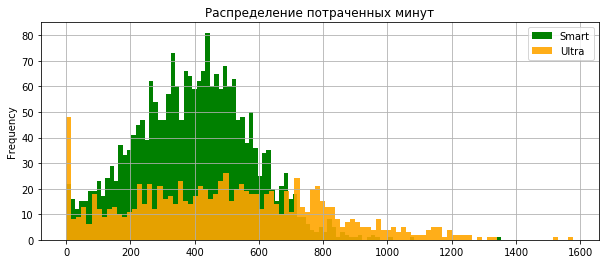

In [43]:
# построение гистограмм по столбцу duration
ax= (data_smart['duration']
     .plot(kind='hist',bins=100,color='green',figsize = (10, 4),label='Smart',grid=True))

(data_ultra['duration']
 .plot(kind='hist',bins=100,ax=ax, color = 'orange',figsize=(10,4),label='Ultra',grid=True,alpha=0.9))

plt.legend()

plt.title('Распределение потраченных минут')
plt.show()

Гистограмма распределения потраченных минут по тарифу Ultra больше скошена вправо, что свидетельствует о том, что клиенты с данным тарифом склонны тратить больше времени на разговор.

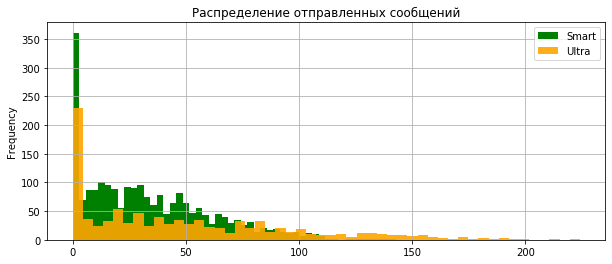

In [44]:
# построение гистограмм по столбцу messages
ax= (data_smart['messages']
     .plot(kind='hist',bins=50,color='green',figsize = (10, 4),label='Smart',grid=True))

(data_ultra['messages']
 .plot(kind='hist',bins=50,ax=ax, color = 'orange',figsize=(10,4),label='Ultra',grid=True,alpha=0.9))

plt.legend()

plt.title('Распределение отправленных сообщений')
plt.show()

Явный выброс в околонулевых значениях свидетельствует о том, что большинство пользователей в обоих тарифах перестали отправлять сообщения вовсе в обоих тарифах.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Отлично!

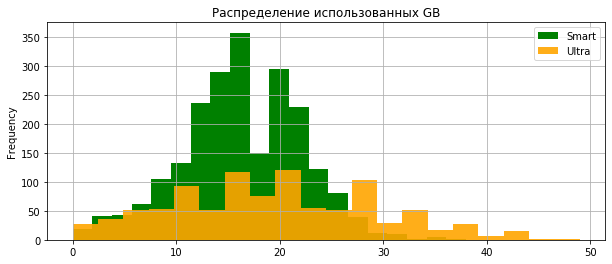

In [45]:
# построение гистограмм по столбцу gb_used
ax= (data_smart['gb_used']
     .plot(kind='hist',bins=20,color='green',figsize = (10, 4),label='Smart',grid=True))

(data_ultra['gb_used']
 .plot(kind='hist',bins=20,ax=ax, color = 'orange',figsize=(10,4),label='Ultra',grid=True,alpha=0.9))

plt.legend()

plt.title('Распределение использованных GB')
plt.show()

По гистограмме потраченных gb можно заметить, что пользователи тарифа Ultra склонны  использовать больше интернета.

Посмотрим как происходит распределение по средним значениям на обоих тарифах.

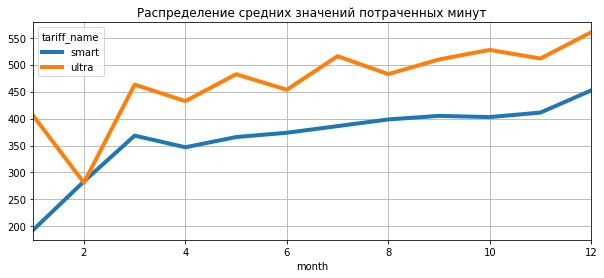

In [46]:
# построение графика по средним значениям столбца duration
(data
 .pivot_table(index = 'month', columns = 'tariff_name', values = 'duration', aggfunc = 'mean')
 .plot(figsize = (10, 4),grid=True,linewidth=4))
plt.title('Распределение средних значений потраченных минут')
plt.show()

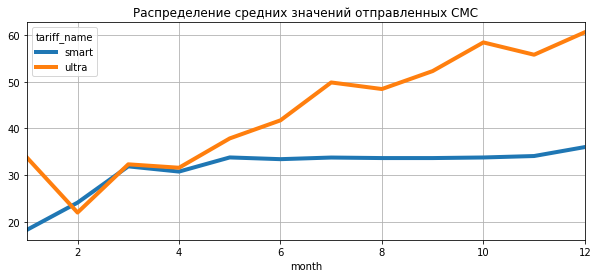

In [47]:
# построение графика по средним значениям столбца messages
(data
 .pivot_table(index = 'month', columns = 'tariff_name', values = 'messages', aggfunc = 'mean')
 .plot(figsize = (10, 4),grid=True,linewidth=4))
plt.title('Распределение средних значений отправленных СМС')
plt.show()

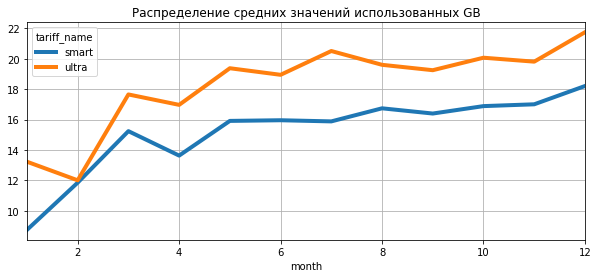

In [48]:
# построение графика по средним значениям столбца gb_used
(data
 .pivot_table(index = 'month', columns = 'tariff_name', values = 'gb_used', aggfunc = 'mean')
 .plot(figsize = (10, 4),grid=True,linewidth=4))
plt.title('Распределение средних значений использованных GB')
plt.show()

**Вывод:**

Согласно предоставленной выборке данных, пользователи чаще используют тариф Smart (около 70%) . Тарифом Ultra же пользуются только 30% клиентов. 

По графикам распределения средних значений явно видно, что в среднем пользователи тарифа Ultra тратят больше времени на разговор, отправляют больше сообщений и интернетом пользуются чаще. 

Также средние значения по тарифу Ultra значительно превышают значения по тарифу Smart:
- потраченные минуты: Smart - 395, Ultra - 498
- отправленные СМС: Smart - 33, Ultra - 49
- интернет в gb : Smart - 16, Ultra - 19.5

Далее проверим, свидетельствует ли данные выводы тому, что тариф Ultra приносит больше прибыли.

## 3. Формулировка и проверка гипотез 

 В ходе данного пункта необходимо проверить две заданные гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

### 3.1 Проверка первой гипотезы

Примем за нулевую гипотезу условие Н0 : средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;

за альтернативную Н1: средняя выручка пользователей тарифов «Ультра» не равняется средней выручке тарифа «Смарт» (гипотеза является двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны)


За alpha - критический уровень статистической значимости примем значение 0.05.



In [49]:
data_smart.revenue.describe()

count    2229.000000
mean     1257.588605
std       800.915599
min       550.000000
25%       550.000000
50%       962.000000
75%      1733.000000
max      6614.000000
Name: revenue, dtype: float64

In [50]:
data_ultra.revenue.describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

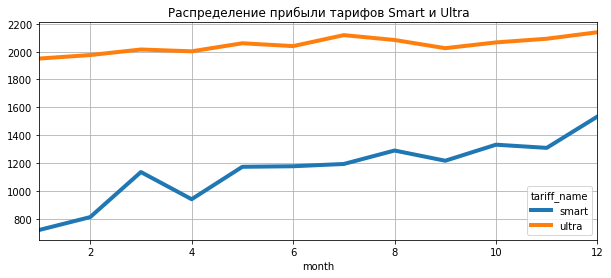

In [51]:
# построение диграммы по средним значениям столбца revenue для тарифов Смарт и Ультра
(data
 .pivot_table(index = 'month', columns = 'tariff_name', values = 'revenue', aggfunc = 'mean')
 .plot(figsize = (10, 4),grid=True,linewidth=4))
plt.title('Распределение прибыли тарифов Smart и Ultra')
plt.show()

Несмотря на то, что по выборке пользователей тарифом Смарт больше, средние показатели по выручке явно выше среди пользователей тарифом Ультра. 
Возможны следующие ситуации:
- нам предоставили по Смарту выгрузку большего размера
- Ультра запускался ограниченно (например в экспериментальном режиме).

С помощью двустороннего теста проверим можно ли в этой ситуции ориентироваться на средние показатели и не является ли наблюдаемая разница шумом или случайностью.

In [52]:
# проведение двустороннего теста

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data_ultra.revenue, 
    data_smart.revenue,
    equal_var = False) #Значение False, так как выборки разного размера

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.179723168444486e-274
Отвергаем нулевую гипотезу


Низкий p-value (ниже уровня значимости) означает, что между тарифами действительно есть разница в средней выручке. То есть, экспериментальные данные очень маловероятны при условии, что нулевая гипотеза верна. Поэтому нулевую гипотезу мы отвергаем, а верным признаем утверждение,сформулированное в альтернативной гипотезе.

### 3.2 Проверка второй гипотезы

Примем за нулевую гипотезу условие Н0 : средняя выручка от пользователей из Москвы равна выручке от пользователей из других регионов;
за альтернативную Н1 : средняя выручка от пользователей из Москвы не равна выручке от пользователей из других регионов;(гипотеза  также является двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны).



In [53]:
# создаем две таблицы для Москвы и остальных регионов
data_moscow = data.query('city == "Москва"') 
data_not_moscow = data.query('city != "Москва"')

In [54]:
# описание значений столбца revenue для жителей москвы
data_moscow.revenue.describe()

count     611.000000
mean     1526.837971
std       750.221433
min       550.000000
25%       750.000000
50%      1750.000000
75%      1950.000000
max      5186.000000
Name: revenue, dtype: float64

In [55]:
# описание значений столбца revenue для жителей других регионов
data_not_moscow.revenue.describe()

count    2603.000000
mean     1501.869766
std       802.533059
min       550.000000
25%       716.500000
50%      1550.000000
75%      1950.000000
max      6614.000000
Name: revenue, dtype: float64

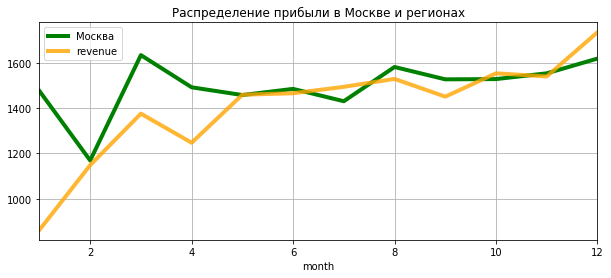

In [56]:
# построение диграммы по средним значениям столбца revenue для жителей Москвы и остальных регионов
ax= (data_moscow
     .pivot_table(index = 'month',columns='city',values = 'revenue', aggfunc = 'mean')
     .plot(color='green',figsize = (10, 4),grid=True,linewidth=4))

(data_not_moscow
 .pivot_table(index = 'month',values = 'revenue', aggfunc = 'mean')
 .plot(ax=ax, color = 'orange',figsize = (10,4),grid = True,alpha = 0.8,linewidth = 4))

plt.legend()

plt.title('Распределение прибыли в Москве и регионах')
plt.show()


Судя по вышепредсталенным данным, средние показатели по прибыли в Москве значительно не отличаются от аналогичных показателей в других регионах.

С помощью двустороннего теста проверим можно ли в этой ситуции ориентироваться на средние показатели и принять нулевую гипотезу.

За alpha - критический уровень статистической значимости примем значение 0.05.

In [57]:
# проведение двустороннего теста

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data_moscow.revenue, 
    data_not_moscow.revenue,
    equal_var = False) #Значение False, так как выборки разного размера

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46532858228722906
Не получилось отвергнуть нулевую гипотезу


Значение p-value оказалось выше уровня значимости, что означает, что среднюю выручку от пользователей из Москвы можно считать равной выручке от пользователей из других регионов.  Поэтому нулевую гипотезу мы отвергнуть не можем.

## 4. Общий вывод

Целью исследования, поставленной оператором сотовой связи «Мегалайн», было провести анализ двух тарифных планов( «Смарт» и «Ультра»)  и сделать вывод — какой тариф приносит больше прибыли.
 
 В ходе анализа дынных было выявлено, что, несмотря на то, что по выборке пользователей тарифом Смарт больше, средние показатели по выручке явно выше среди пользователей тарифом Ультра. Также, двусторонний тест показал, то наблюдаемая разница действительно существует ( нулевая гипотеза была отвергнута) . Поэтому, опираясь на средние показатели делаем вывод, что **тариф Ультра приносит больше прибыли, чем тариф Смарт.**
 
 Второй задачей было выяснить отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов. В ходе статистического анализа, нулевую гипотезу отвергнуть неполучилось, поэтому **среднюю выручку от пользователей из Москвы признаем равной выручке от пользователей из других регионов.** 